In [1]:
class Example:
    def __init__(self, name) -> None:
        self.name = name
    
    @property
    def get_name(self):
        return self.name
    
    @property
    def set_name(self, name):
        self.name = name

In [2]:
w = Example("July")
w.name = 'August'
w.name

'August'

In [1]:
import matplotlib.pyplot as plt

from agent import Prey, scene3d

prey1 = Prey(1, 0, (10, 0))
prey2 = Prey(2, 0, (10, 20))


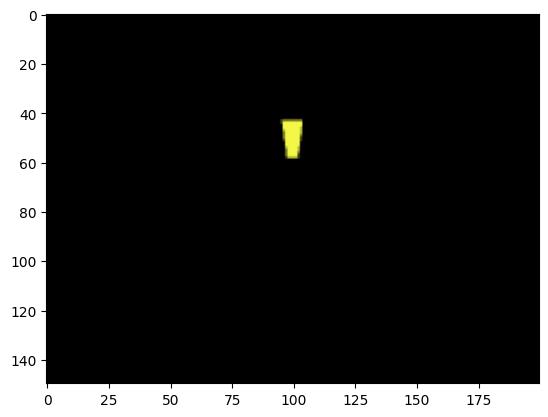

In [2]:
import matplotlib.pyplot as plt
plt.imshow(prey1.get_camera_data())

In [2]:
scene3d.mesh_nodes

{<pyrender.node.Node at 0x1bec06bd520>,
 <pyrender.node.Node at 0x1bec1a75e80>}

In [8]:
scene3d.get_pose(prey1.node3d)

array([[ 0.54030231, -0.84147098,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [9]:
import pyrender as pr
render3d = pr.OffscreenRenderer(200, 100)

In [10]:
c,d = render3d.render(scene3d)

In [12]:
c

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [1]:
color = (135, 206, 235)
c_max = max(color)
c_min = min(color)

color.index(c_max)

2

In [1]:
from utils import color_rgb2hsv

color_rgb2hsv((255, 0, 0))

(0, 255, 255)

In [2]:
tuple(c - 10 for c in color_rgb2hsv((135, 206, 235)))

(129, 98, 225)

### visual following algorithm

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
hsv[0]

98

In [26]:
hsv = color_rgb2hsv((135, 206, 235))
hsv_l = (hsv[0] - 5, 50, 50)
hsv_h = (hsv[1] + 5, 255, 255)

img_raw = cv2.imread('view.png')
img_raw_hsv = cv2.cvtColor(img_raw, cv2.COLOR_RGB2HSV)
img_f = cv2.inRange(img_raw_hsv, hsv_l, hsv_h)

In [27]:
img_f.sum()/255

0.0

In [24]:
np.where(img_f>1)

(array([73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
        73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
        73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
        74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
        74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
        74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76, 76, 76, 76, 76, 76], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88,  0,  1,  2,  3,  4,  

In [25]:
np.mean(np.where(img_f>1)[1])

52.97175141242938

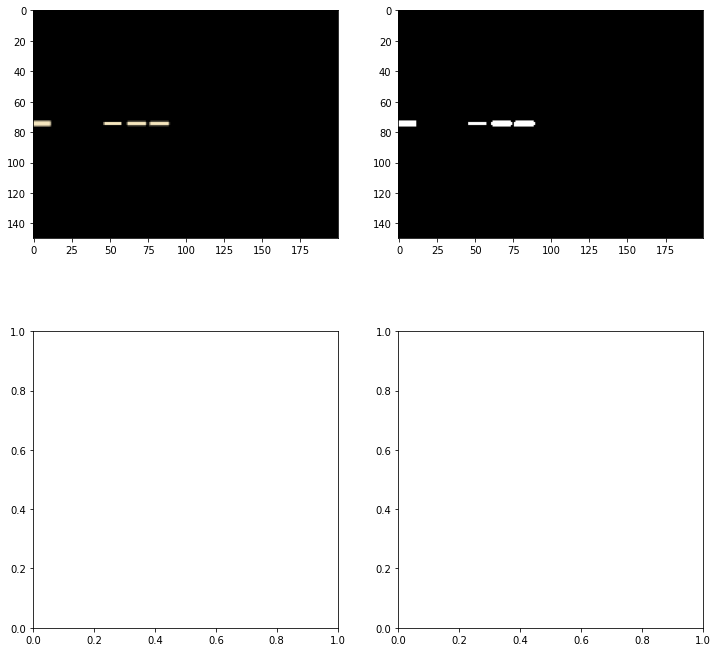

In [19]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].imshow(img_raw)
ax[0][1].imshow(img_f, cmap='gray')

In [35]:
from collections import deque

d = deque(maxlen=3)

d.append(1)
d.append(2)
d.append(3)
d

deque([1, 2, 3])

In [36]:
d.append(4)

In [38]:
p = deque(maxlen=3)

p.append(1)
p.append(2)
p.append(3)
p

deque([1, 2, 3])

In [39]:
p[0] + p[1]

3

In [2]:
a = ()

1 in a

False

In [4]:
import numpy as np

In [6]:
np.random.rand(1)[0] * 10 + 5

8.593365204226565

In [1]:
for i, a in enumerate([1,2]):
    print(i,a)

0 1
1 2


In [10]:
import numpy as np

In [55]:
temp_a_e = [(i, a) for i, a in enumerate([2,10,4,12,8])]
temp_a_e = sorted(temp_a_e, key=lambda x:x[1])
sum_ = sum([a_[1] for a_ in temp_a_e])
partial_p = np.cumsum([a_[1]/sum_ for a_ in temp_a_e])
p_ = 1
ind = np.where(partial_p < p_)[0][-1] if len(np.where(partial_p < p_)[0])>0 else -1
l.append(temp_a_e[ind + 1][0])

In [57]:
        self.f_gather = np.random.randn(1)[0] * 4 + 5
        self.f_avoid = np.random.randn(1)[0] * 5 + 0.1

3

In [61]:
l = []
for p_ in np.random.rand(10000):
    ind = np.where(partial_p <= p_)[0][-1] if len(np.where(partial_p <= p_)[0])>0 else -1
    l.append(temp_a_e[ind + 1][0])

In [54]:
for i in range(len([2,10,4,12,8])):
    print(l.count(i))

58
258
92
346
246


In [42]:
len(np.where(partial_p < p_)[0]

array([], dtype=int64)

In [44]:
if np.where(partial_p < p_)[0]:
    print("r")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1756\2584477166.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.where(partial_p < p_)[0]:


In [38]:
np.where(partial_p < p_)

(array([], dtype=int64),)

In [63]:
a = [1,2,3]
a.remove(1)
a

[2, 3]

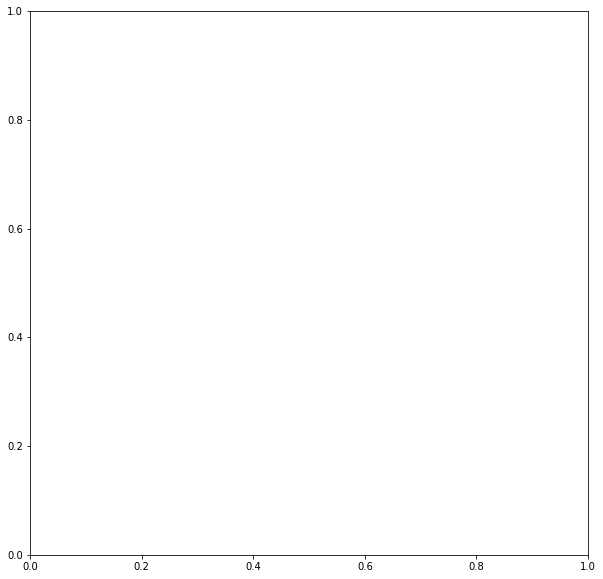

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))


In [6]:
np.histogram([0.1, 0.2, 2, 0.9, 9,8, 5.4, 12,1 ,1.2], bins=5)

(array([6, 0, 1, 2, 1], dtype=int64),
 array([ 0.1 ,  2.48,  4.86,  7.24,  9.62, 12.  ]))

In [8]:
18-4.2+10+16+1-6.4-4.145+3

33.254999999999995

In [82]:
24.565/((1+0.03192)**3)

22.355206156758396

In [83]:
24.565*(1-0.03192)**3

22.286943509342247

In [84]:
6.035/1.670

3.6137724550898205

In [87]:
1.941*1.1*3.618

7.724791800000001

In [88]:
2.18/6

0.36333333333333334

In [89]:
(7.7248 + 5.7468)/2

6.7358

In [10]:
x = {1:[0,1,2],2:[0,1],3:[0]}

k,v =sorted(x.items(), key=lambda v:len(v[1]))[-1]

In [11]:
v

[0, 1, 2]

In [ ]:
import scipy.io as sio